# Gathering

- Download 'twitter_archive_enhanced.csv'
- download programmaticaly using *request* 'image_predictions.tsv'
- query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tweepy
import requests
import wptools
import os
import json
import time
from sqlalchemy import create_engine
import seaborn as sns; sns.set()
from PIL import Image
from io import BytesIO
from timeit import default_timer as timer
from tweepy import OAuthHandler

In [6]:
#twitter Archive loaded to pandas
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [7]:
# get image_predictions file from URL
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name = url.split('/')[-1]
response = requests.get(url)

if not os.path.isfile(file_name):
    with open(file_name, 'wb') as f:
        f.write(response.content)

In [8]:
# after downloaded the file read it with pandas:
image_predictions = pd.read_csv(file_name, sep ='\t')

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [9]:
#load tweets data into pandas df
with open('tweet_json.txt') as file:
    
    df_api = pd.read_json(file, lines= True, encoding = 'utf-8')

In [10]:
df_api

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status
0,2015-11-15 22:32:08+00:00,666020888022790149,666020888022790144,Here we have a Japanese Irish Setter. Lost eye...,False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,False,445,2337,False,False,False,False,en,NaN
1,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,False,41,118,False,False,False,False,en,NaN
2,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,False,39,107,False,False,False,False,en,NaN
3,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,False,122,262,False,False,False,False,en,NaN
4,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,False,38,94,False,False,False,False,en,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,False,8178,36731,False,False,False,False,en,NaN
2055,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,False,7597,38463,False,False,False,False,en,NaN
2056,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,False,3645,22896,False,False,False,False,en,NaN
2057,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,False,5519,30447,False,False,False,False,en,NaN


## Assessing

### observation
#### in this project i used Execl, and pandas data Frame to assess the date

#### Quality issues 

- Columns [ doggo, floofer, pupper, puppo] is None Value
- columns name contains 745 name mentioned as None
- and also contains 55 named with a
- Pets classification column; doggo, floofer, pupper, puppo;  classifyed as bject however it should be categorical.
- time stamp type as str however it should be timedate.
- source coulmn type html <> howevr it should be str.
- in rating_denominator, and rating_numerator columns there are reatings less 10 and ratings above 10
- id column in df_api name different from other 2 data sets.


### Tidiness

- columns (p1, p1_dog, p1_conf, ...etc) should be just breed and confidence.
- columns (doggo, floofer, pupper, puppo ) all about samething
- it's better to combine (twitter_archive_enhanced,image_predictions, api_df) in one dataset.

In [11]:
twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [12]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
twitter_archive_enhanced.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [14]:
twitter_archive_enhanced.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
            ... 
Amber          1
Chaz           1
Meatball       1
Mairi          1
Sojourner      1
Name: name, Length: 957, dtype: int64

In [15]:
twitter_archive_enhanced[twitter_archive_enhanced.name.str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None


In [16]:
twitter_archive_enhanced.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [17]:
twitter_archive_enhanced[['rating_denominator','rating_numerator']].describe()

,rating_denominator,rating_numerator
count,2356.000000,2356.000000
mean,10.455433,13.126486
std,6.745237,45.876648
min,0.000000,0.000000
25%,10.000000,10.000000
50%,10.000000,11.000000
75%,10.000000,12.000000
max,170.000000,1776.000000


In [18]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [19]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [20]:
image_predictions.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [21]:
image_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [22]:
image_predictions.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

In [23]:
df_api

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status
0,2015-11-15 22:32:08+00:00,666020888022790149,666020888022790144,Here we have a Japanese Irish Setter. Lost eye...,False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,False,445,2337,False,False,False,False,en,NaN
1,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,False,41,118,False,False,False,False,en,NaN
2,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,False,39,107,False,False,False,False,en,NaN
3,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,False,122,262,False,False,False,False,en,NaN
4,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,False,38,94,False,False,False,False,en,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,False,8178,36731,False,False,False,False,en,NaN
2055,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,False,7597,38463,False,False,False,False,en,NaN
2056,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,False,3645,22896,False,False,False,False,en,NaN
2057,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,False,5519,30447,False,False,False,False,en,NaN


In [24]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2059 non-null   datetime64[ns, UTC]
 1   id                             2059 non-null   int64              
 2   id_str                         2059 non-null   int64              
 3   full_text                      2059 non-null   object             
 4   truncated                      2059 non-null   bool               
 5   display_text_range             2059 non-null   object             
 6   entities                       2059 non-null   object             
 7   extended_entities              2059 non-null   object             
 8   source                         2059 non-null   object             
 9   in_reply_to_status_id          23 non-null     float64            
 10  in_reply_to_status_id_st

In [25]:
df_api.lang.value_counts()

en    2051
nl       3
in       2
eu       1
ro       1
et       1
Name: lang, dtype: int64

In [26]:
df_api.sample()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status
1976,2017-06-09 16:22:42+00:00,873213775632977920,873213775632977920,This is Sierra. She's one precious pupper. Abs...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 873213769794670593, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,False,1405,6583,False,False,False,False,en,NaN


## Cleaning

In [28]:
# make copy from all data sets.
df_api_cleanded = df_api.copy()
img_pred_cleaned  =image_predictions.copy()
twitter_archive_cleaned = twitter_archive_enhanced.copy()

### Define
Columns [ doggo, floofer, pupper, puppo] is None Value, will be replaced

### code

In [29]:
# create loop to replace all None Values with np.nan.
columns_list = ['doggo', 'floofer', 'pupper', 'puppo']
for x in columns_list:
    twitter_archive_cleaned[x]= twitter_archive_cleaned[x].replace('None', np.nan)


### Test

In [30]:
twitter_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       97 no

### Define
- in twitter_archive_cleaned name column.will replace 'None'valued with np.name
- then will remove any rows  starts with lower letters.

In [31]:
twitter_archive_cleaned[~twitter_archive_cleaned.name.str.istitle()].name.unique()


array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'BeBe', 'mad',
       'an', 'very', 'just', 'DonDon', 'my', 'his', 'actually', 'getting',
       'this', 'unacceptable', 'all', 'old', 'infuriating', 'CeCe', 'the',
       'by', 'officially', 'life', 'light', 'space', 'JD', 'DayZ'],
      dtype=object)

In [32]:
twitter_archive_cleaned['name'].replace(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'BeBe', 'mad',
       'an', 'very', 'just', 'DonDon', 'my', 'his', 'actually', 'getting',
       'this', 'unacceptable', 'all', 'old', 'infuriating', 'CeCe', 'the',
       'by', 'officially', 'life', 'light', 'space', 'JD', 'DayZ','None'], np.nan,inplace = True)

### Test

In [33]:
twitter_archive_cleaned['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey',
       'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper',
       'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle', 'Zooey',

In [34]:
twitter_archive_cleaned['name'].value_counts()

Charlie      12
Lucy         11
Cooper       11
Oliver       11
Tucker       10
             ..
Katie         1
Meatball      1
Mairi         1
Blue          1
Sojourner     1
Name: name, Length: 926, dtype: int64

### Define

###### Extract tweet source from source column by apply( ) in pandas then will convert it to categorical type

### Code

In [35]:
# firstly: i'll check unique values in source columnsin twitter_archive_cleaned
twitter_archive_cleaned['source'].unique()


array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [36]:
# then Create function to return the string without<>
def clean_source(x):
    V =x.find(">")+1
    Y =x[V:].find("<")
    return x[V:][:Y]

In [37]:

twitter_archive_cleaned['source'] =twitter_archive_cleaned['source'].apply(lambda x:clean_source(x)).astype('category')

### Test

In [38]:
twitter_archive_cleaned['source'].unique()

['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene', 'TweetDeck']
Categories (4, object): ['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene', 'TweetDeck']

### Define
##### Convert timestamp column to datetime from str.

### Code

In [39]:
twitter_archive_cleaned['timestamp'] = pd.to_datetime(twitter_archive_cleaned['timestamp'])

### Test

In [40]:
twitter_archive_cleaned['timestamp'].dtype

datetime64[ns, UTC]

### Define

#####  remove any rate in rating_denominator  column except 10.

### Code

In [41]:
twitter_archive_cleaned = twitter_archive_cleaned[twitter_archive_cleaned['rating_denominator'] == 10] 

### Test

In [42]:
twitter_archive_cleaned[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2333.000000,2333.0
mean,12.237462,10.0
std,41.022472,0.0
min,0.000000,10.0
25%,10.000000,10.0
50%,11.000000,10.0
75%,12.000000,10.0
max,1776.000000,10.0


### Define

#### Remove rows not related to dogs.

### Code

In [43]:
twitter_archive_cleaned = twitter_archive_cleaned[~twitter_archive_cleaned.text.isnull()]

In [44]:
twitter_archive_cleaned = twitter_archive_cleaned.loc[~twitter_archive_cleaned.text.str.match('.*only rate dogs')]


### Test

In [45]:
twitter_archive_cleaned.loc[twitter_archive_cleaned.text.str.match('.*only rate dogs')]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [46]:
twitter_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2269 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2269 non-null   int64              
 1   in_reply_to_status_id       72 non-null     float64            
 2   in_reply_to_user_id         72 non-null     float64            
 3   timestamp                   2269 non-null   datetime64[ns, UTC]
 4   source                      2269 non-null   category           
 5   text                        2269 non-null   object             
 6   retweeted_status_id         171 non-null    float64            
 7   retweeted_status_user_id    171 non-null    float64            
 8   retweeted_status_timestamp  171 non-null    object             
 9   expanded_urls               2214 non-null   object             
 10  rating_numerator            2269 non-null   int64           

### Define
 will create dog_rank column and remove columns[ doggo, floofer, pupper, puppo]

### Code

In [47]:
col = ['doggo', 'floofer', 'pupper', 'puppo']


In [48]:
cols = ['doggo', 'floofer', 'pupper', 'puppo']

# create the dog_stage column
twitter_archive_cleaned['dog_rank'] = twitter_archive_cleaned[cols].\
                                        apply(lambda x: ', '.join(x.dropna().astype(str)),axis =1)
# replace the empty string with nan and change datatype to category
twitter_archive_cleaned.dog_rank = twitter_archive_cleaned.dog_rank.replace('', np.nan).astype('category')

# drop the other columns
twitter_archive_cleaned = twitter_archive_cleaned.drop(columns = cols, axis =1)


### Test

In [49]:
twitter_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2269 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2269 non-null   int64              
 1   in_reply_to_status_id       72 non-null     float64            
 2   in_reply_to_user_id         72 non-null     float64            
 3   timestamp                   2269 non-null   datetime64[ns, UTC]
 4   source                      2269 non-null   category           
 5   text                        2269 non-null   object             
 6   retweeted_status_id         171 non-null    float64            
 7   retweeted_status_user_id    171 non-null    float64            
 8   retweeted_status_timestamp  171 non-null    object             
 9   expanded_urls               2214 non-null   object             
 10  rating_numerator            2269 non-null   int64           

In [50]:
twitter_archive_cleaned.dog_rank.value_counts()

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_rank, dtype: int64

## Define

Extract rating scores  from tweet text and convert it to float type.

In [51]:
twitter_archive_cleaned[twitter_archive_cleaned.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]


C:\Users\masel\.jupyter\New folder\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
340,"RT @dog_rates: This is Logan, the Chow who liv...",75
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1689,I've been told there's a slight possibility he...,5
1712,Here we have uncovered an entire battalion of ...,26


In [52]:
new_rate = twitter_archive_cleaned[twitter_archive_cleaned.text.str.contains(r"(\d+\.\d*\/\d+)")]['text'].str.extract(r"(\d+\.\d*(?=\/\d+))")
new_rate


C:\Users\masel\.jupyter\New folder\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,0
45,13.5
340,9.75
695,9.75
763,11.27
1689,9.5
1712,11.26


In [53]:
twitter_archive_cleaned.loc[new_rate.index, 'rating_numerator'] = new_rate.values


In [54]:
twitter_archive_cleaned.rating_numerator = twitter_archive_cleaned.rating_numerator.astype('float')


### Test

In [55]:
twitter_archive_cleaned.loc[new_rate.index]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_rank
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19+00:00,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,13.50,10,Bella,NaN
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49+00:00,Twitter for iPhone,"RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,NaN
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56+00:00,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,NaN
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34+00:00,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,pupper
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27+00:00,Twitter for iPhone,I've been told there's a slight possibility he...,NaN,NaN,NaN,NaN,9.50,10,NaN,NaN
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00+00:00,Twitter for iPhone,Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,11.26,10,NaN,NaN


In [56]:
twitter_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2269 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2269 non-null   int64              
 1   in_reply_to_status_id       72 non-null     float64            
 2   in_reply_to_user_id         72 non-null     float64            
 3   timestamp                   2269 non-null   datetime64[ns, UTC]
 4   source                      2269 non-null   category           
 5   text                        2269 non-null   object             
 6   retweeted_status_id         171 non-null    float64            
 7   retweeted_status_user_id    171 non-null    float64            
 8   retweeted_status_timestamp  171 non-null    object             
 9   expanded_urls               2214 non-null   object             
 10  rating_numerator            2269 non-null   float64         

## Define

Remove rating & URL from text col

### Code


In [57]:
twitter_archive_cleaned['text'][0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [58]:
twitter_archive_cleaned['text'] = twitter_archive_cleaned['text'].str.extract('(.+(?=\s\d+/\d+\s))')


### Test

In [59]:
twitter_archive_cleaned['text'].head(15)

0     This is Phineas. He's a mystical boy. Only eve...
1     This is Tilly. She's just checking pup on you....
2     This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal.
4     This is Franklin. He would like you to stop ca...
5     Here we have a majestic great white breaching ...
6     Meet Jax. He enjoys ice cream so much he gets ...
7     When you watch your owner call another dog a g...
8     This is Zoey. She doesn't want to be one of th...
9     This is Cassie. She is a college pup. Studying...
10    This is Koda. He is a South Australian decksha...
11    This is Bruno. He is a service shark. Only get...
12    Here's a puppo that seems to be on the fence a...
13    This is Ted. He does his best. Sometimes that'...
14    This is Stuart. He's sporting his favorite fan...
Name: text, dtype: object

### Define

Remove retweets and it's replies.

### Code

In [60]:
twitter_archive_cleaned = twitter_archive_cleaned.query('in_reply_to_status_id == "NaN" &\
                                                     in_reply_to_user_id == "NaN" &\
                                                    retweeted_status_id == "NaN" &\
                                                    retweeted_status_user_id == "NaN"')
# remove columns
cols = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
           'retweeted_status_user_id', 'retweeted_status_timestamp']
twitter_archive_cleaned.drop(columns = cols, axis=1, inplace=True)


### Test

In [61]:
twitter_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2026 non-null   int64              
 1   timestamp           2026 non-null   datetime64[ns, UTC]
 2   source              2026 non-null   category           
 3   text                1963 non-null   object             
 4   expanded_urls       2023 non-null   object             
 5   rating_numerator    2026 non-null   float64            
 6   rating_denominator  2026 non-null   int64              
 7   name                1380 non-null   object             
 8   dog_rank            336 non-null    category           
dtypes: category(2), datetime64[ns, UTC](1), float64(1), int64(2), object(3)
memory usage: 107.2+ KB


### Define

### removing img_num columns from image_predictions



### Code

In [62]:
img_pred_cleaned.drop('img_num', axis = 1, inplace = True)

### Test

In [63]:
img_pred_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   p1        2075 non-null   object 
 3   p1_conf   2075 non-null   float64
 4   p1_dog    2075 non-null   bool   
 5   p2        2075 non-null   object 
 6   p2_conf   2075 non-null   float64
 7   p2_dog    2075 non-null   bool   
 8   p3        2075 non-null   object 
 9   p3_conf   2075 non-null   float64
 10  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 103.4+ KB


### Define 

#### Create breed and confidence columns with highest confidence predictions and drop other columns 

### Code

In [64]:
breed = []
confidence = []
for index, row in img_pred_cleaned.iterrows():
    if row['p1_dog'] and row['p1_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] and row['p2_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] and row['p3_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append(np.nan)
        confidence.append(np.nan)
        
img_pred_cleaned['breed'] = breed
img_pred_cleaned['confidence'] = confidence


In [65]:
df_pred_cleaned = img_pred_cleaned[['tweet_id', 'jpg_url', 'breed', 'confidence']]


### Test

In [66]:
df_pred_cleaned.sample(10)

,tweet_id,jpg_url,breed,confidence
87,667524857454854144,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,NaN,NaN
981,707377100785885184,https://pbs.twimg.com/media/CdEbt0NXIAQH3Aa.jpg,golden_retriever,0.637225
251,670704688707301377,https://pbs.twimg.com/media/CU7SW39WwAAL8Rw.jpg,Norwich_terrier,0.419838
1383,765669560888528897,https://pbs.twimg.com/media/CqA0XcYWAAAzltT.jpg,beagle,0.993333
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,NaN,NaN
1117,725786712245440512,https://pbs.twimg.com/media/ChKDKmIWIAIJP_e.jpg,chow,0.335761
1341,758828659922702336,https://pbs.twimg.com/media/Cofmom_VUAA4dRO.jpg,Chesapeake_Bay_retriever,0.480048
1730,821044531881721856,https://pbs.twimg.com/media/C2Tvo20XcAAhNL9.jpg,Old_English_sheepdog,0.148020
476,675153376133427200,https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg,NaN,NaN
935,703407252292673536,https://pbs.twimg.com/media/CcMBJODUsAI5-A9.jpg,NaN,NaN


In [67]:
df_pred_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2075 non-null   int64  
 1   jpg_url     2075 non-null   object 
 2   breed       1532 non-null   object 
 3   confidence  1532 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 48.7+ KB


### Define 

Unnecessary Columns will be dropped from df_api_cleanded


### Code

In [68]:
df_api_cleanded.columns


Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status'],
      dtype='object')

In [69]:
df_api_cleanded = df_api_cleanded[['id', 'retweet_count', 'favorite_count']]

### Test

In [70]:
df_api_cleanded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2059 non-null   int64
 1   retweet_count   2059 non-null   int64
 2   favorite_count  2059 non-null   int64
dtypes: int64(3)
memory usage: 48.3 KB


### Define
#####  rename df_api_cleanded columns then Amerge data sets

## code


In [71]:
df_api_cleanded.columns = ['tweet_id', 'retweet_count', 'favorite_count']


In [72]:
df_api_cleanded.columns


Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

In [73]:
#merge data sets
new_df = pd.merge(twitter_archive_cleaned, df_pred_cleaned, on= 'tweet_id')
new_df = pd.merge(new_df, df_api_cleanded, on = 'tweet_id')

In [74]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1894 entries, 0 to 1893
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1894 non-null   int64              
 1   timestamp           1894 non-null   datetime64[ns, UTC]
 2   source              1894 non-null   category           
 3   text                1834 non-null   object             
 4   expanded_urls       1894 non-null   object             
 5   rating_numerator    1894 non-null   float64            
 6   rating_denominator  1894 non-null   int64              
 7   name                1333 non-null   object             
 8   dog_rank            302 non-null    category           
 9   jpg_url             1894 non-null   object             
 10  breed               1399 non-null   object             
 11  confidence          1399 non-null   float64            
 12  retweet_count       1894 non-null 

In [86]:
##Save as CSV
new_df.to_csv('Data',index=False, sep = ";")

In [87]:
#save it in SQL 
engine = create_engine('sqlite://', echo=False)
new_df.to_sql('new_df', con=engine,index_label='id')

In [88]:
#test SQL 
new_df = pd.read_sql('SELECT * FROM new_df', engine, parse_dates='timestamp')
new_df.source = new_df.source.astype('category')
new_df.dog_rank = new_df.dog_rank.astype('category')
new_df.breed = new_df.breed.astype('category')
new_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  1894 non-null   int64         
 1   tweet_id            1894 non-null   int64         
 2   timestamp           1894 non-null   datetime64[ns]
 3   source              1894 non-null   category      
 4   text                1834 non-null   object        
 5   expanded_urls       1894 non-null   object        
 6   rating_numerator    1894 non-null   float64       
 7   rating_denominator  1894 non-null   int64         
 8   name                1333 non-null   object        
 9   dog_rank            302 non-null    category      
 10  jpg_url             1894 non-null   object        
 11  breed               1399 non-null   category      
 12  confidence          1399 non-null   float64       
 13  retweet_count       1894 non-null   int64       

## Visualizations

-  the ratings distribution by ploting a bar chart

C:\Users\masel\.jupyter\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


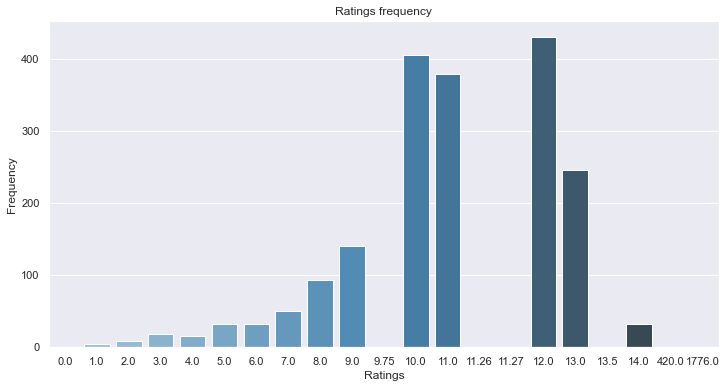

In [89]:
data = new_df.rating_numerator.value_counts()

x = data.index
y = data.values
fig, ax = plt.subplots(figsize=(12, 6))
g = sns.barplot(x, y, palette='Blues_d', ax=ax)
ax.set(xlabel='Ratings', ylabel='Frequency', title='Ratings frequency')
plt.show()


- distribution With box plot

C:\Users\masel\.jupyter\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\masel\.jupyter\New folder\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


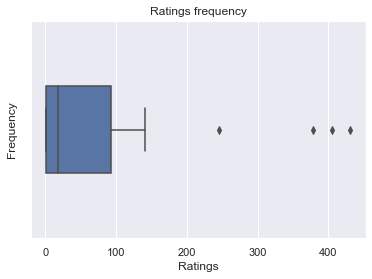

In [90]:
data = new_df.rating_numerator.value_counts()

ax = sns.boxplot(data, orient='v', width=.4)
ax.set(xlabel='Ratings', ylabel='Frequency', title='Ratings frequency')
plt.show()

- There ar 2 outliers

In [91]:
outliers_df = new_df[new_df.rating_numerator > 400][['rating_numerator', 'name', 'jpg_url', 'text']]
outliers_df


,rating_numerator,name,jpg_url,text
688,1776.0,Atticus,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,This is Atticus. He's quite simply America af.
1620,420.0,None,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,Good dogg.


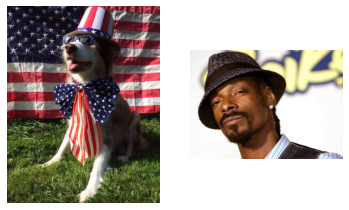

In [92]:
if not os.path.exists('images'):
    os.makedirs('images')
fig=plt.figure()
c = 1
for index, row in outliers_df.iterrows():
    r = requests.get(row['jpg_url'])
    i = Image.open(BytesIO(r.content))
    i.save('images/' +  str(index) + '_' + str(row['rating_numerator']) + "_" + str(row['name']) + '.jpg')
    fig.add_subplot(1, 2, c)
    c += 1
    plt.imshow(i)
    plt.axis("off")
plt.show()


## Define

- This picture with 1776 rating is simply very cute dog and has the best rating score but the other pic with 420 rating score is the rap star Snoop Dogg and should be removed from our data.

## Code

In [93]:
# remove snop dog
new_df.drop(index=1620, inplace=True)


# Test

In [94]:
new_df.query('rating_numerator == 420')


,id,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_rank,jpg_url,breed,confidence,retweet_count,favorite_count


In [95]:
new_df.rating_numerator.unique()

array([1.300e+01, 1.200e+01, 1.400e+01, 1.350e+01, 1.100e+01, 6.000e+00,
       1.000e+01, 0.000e+00, 9.750e+00, 5.000e+00, 1.127e+01, 3.000e+00,
       7.000e+00, 8.000e+00, 9.000e+00, 4.000e+00, 1.776e+03, 1.126e+01,
       2.000e+00, 1.000e+00])

### check the correlation between favorites and retweets


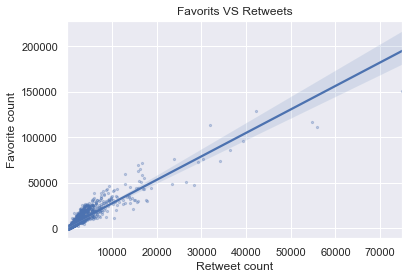

In [97]:
# will check the corelation between favorites and retweets

ax = sns.regplot(x='retweet_count', y='favorite_count', data=new_df, color='b', scatter_kws={'s':5, 'alpha':.3}) 
ax.set(xlabel='Retweet count', ylabel='Favorite count', title='Favorits VS Retweets')
plt.show()

- AS shown in this diagram the correlation between Favorits and retweets is positive

### check most popular rank

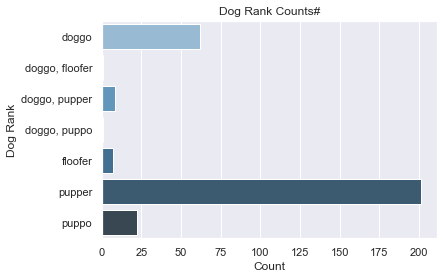

In [98]:

dags = new_df.groupby('dog_rank').count()['tweet_id']
ax = sns.barplot(y=dags.index, x=dags.values, palette='Blues_d')
ax.set(xlabel='Count', ylabel='Dog Rank', title='Dog Rank Counts#')
plt.show()

- Most common rank as per diagram is pupper

## Complaring between tweets sources

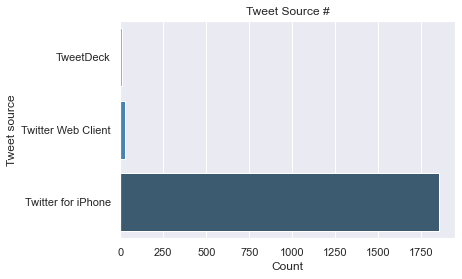

In [99]:
data = new_df.groupby('source').count()['tweet_id']
ax = sns.barplot(y=data.index, x=data.values, palette='Blues_d')
ax.set(xlabel='Count', ylabel='Tweet source', title='Tweet Source #')
plt.show()

- As shown the most of data bringed from twitter for iphone